In [1]:
import torch
import matplotlib.pyplot as plt
from pssr.data import ImageDataset
from pssr.crappifiers import AdditiveGaussian, Poisson
from pssr.models import ResUNet
from pssr.loss import SSIMLoss
from pssr.train import train_paired

In [9]:
lr = 5e-5

lr_scale = 4

In [3]:
dataset = ImageDataset("data/EM_hr_1_10", hr_res=256)

In [4]:
model = ResUNet(
    channels=1,
    hidden=[64, 128, 256, 512, 1024],
    scale=lr_scale,
    depth=3,
)

In [5]:
batch_size = 16
device = "cuda" if torch.cuda.is_available() else "cpu"

kwargs = dict(
    num_workers = 4,
    pin_memory = True,
)

In [10]:
loss_fn = SSIMLoss(mix=.8, ms=True)
optim = torch.optim.AdamW(model.parameters(), lr=lr)

losses = train_paired(
    model=model,
    dataset=dataset,
    batch_size=batch_size,
    loss_fn=loss_fn,
    optim=optim,
    epochs=10,
    device=device,
    dataloader_kwargs=kwargs,
    log_frequency=50,
)

mse[0.00330], pixel[14.66], psnr[24.25], ssim[0.625]: 100%|██████████| 675/675 [01:42<00:00,  6.60it/s]
mse[0.00327], pixel[14.58], psnr[24.29], ssim[0.626]: 100%|██████████| 675/675 [01:38<00:00,  6.82it/s]
mse[0.00326], pixel[14.57], psnr[24.30], ssim[0.626]: 100%|██████████| 675/675 [01:44<00:00,  6.47it/s]
mse[0.00326], pixel[14.55], psnr[24.31], ssim[0.627]: 100%|██████████| 675/675 [01:48<00:00,  6.22it/s]
mse[0.00326], pixel[14.56], psnr[24.30], ssim[0.626]: 100%|██████████| 675/675 [01:48<00:00,  6.22it/s]
mse[0.00324], pixel[14.52], psnr[24.33], ssim[0.626]: 100%|██████████| 675/675 [01:48<00:00,  6.21it/s]
mse[0.00325], pixel[14.54], psnr[24.32], ssim[0.626]: 100%|██████████| 675/675 [01:48<00:00,  6.21it/s]
mse[0.00325], pixel[14.54], psnr[24.32], ssim[0.626]: 100%|██████████| 675/675 [01:48<00:00,  6.21it/s]
mse[0.00324], pixel[14.51], psnr[24.33], ssim[0.627]: 100%|██████████| 675/675 [01:48<00:00,  6.21it/s]
mse[0.00323], pixel[14.49], psnr[24.35], ssim[0.627]: 100%|█████

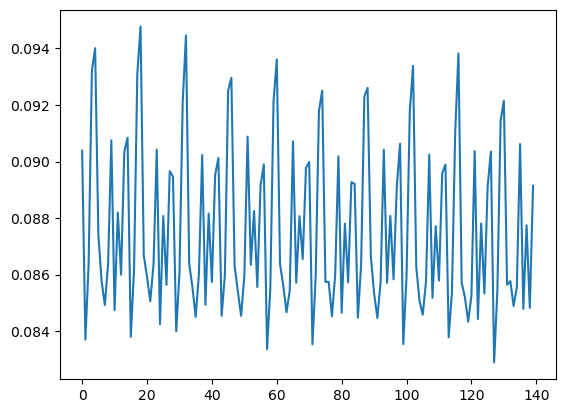

In [11]:
plt.plot(losses)

In [12]:
torch.save(model.state_dict(), "model_256.pth")